# Geochemistry

In this notebook we will interrogate tables of geochemical data using mainly the Python packages 'pandas' and 'pyrolite'. Pandas makes handling tabular data in Python incredibly easy and, as it runs numpy in the background, the calculations are fast. Most packages that rely on tabular data are built to work with pandas, so it's worth mastering pandas fundamental for performing data analysis in Python. `Pyrolite`, developed by Morgan Williams (CSIRO), provides built-in functions that can simplify geochemical data manipulations. While Pyrolite provides some functionality specific to geochemical data (e.g. geochemical plot templates), it is not the only library useful for geological plotting and compositional data. As we go, this notebook will demonstrate several packages for geochemical plotting tasks.

- You can read the pandas docs here: https://pandas.pydata.org/

- You can read the pyrolite docs here: https://pyrolite.readthedocs.io/en/main/


---



In [1]:
# This cell is only necessary if we're running in Google colab
!pip install pandas numpy pyrolite==0.3.5 seaborn matplotlib

  Using cached https://files.pythonhosted.org/packages/84/ad/a56de358692f3446d2359e509f673ace62a3700f63687491840b17373ed9/pyrolite-0.3.5-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/f0/fa/dcfe0f65660661db757ee9ebd84e170ff98edd5d80235f62457d9088f85f/numpydoc-1.7.0-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/78/17/853354204e1ca022d6b7d011ca7f3206c4f8faa3cc743e92609b49c1d83f/tinydb-4.8.2-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/60/f6/251635c032d4eca83fa880c27e40c9849ef74110d971c3a64f6347cb5a3d/mpltern-1.0.4-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/99/ff/c87e0622b1dadea79d2fb0b25ade9ed98954c9033722eb707053d310d4f3/sympy-1.13.3-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/84/a9/2bf119f3f9cff1f376f9

    ERROR: Command errored out with exit status 1:
     command: 'c:\users\283284g\appdata\local\programs\python\python38-32\python.exe' 'c:\users\283284g\appdata\local\programs\python\python38-32\lib\site-packages\pip\_vendor\pep517\_in_process.py' prepare_metadata_for_build_wheel 'C:\Users\283284G\AppData\Local\Temp\tmph_0p_qhc'
         cwd: C:\Users\283284G\AppData\Local\Temp\pip-install-sr2kbaup\scipy
    Complete output (45 lines):
    + meson setup --prefix=c:\users\283284g\appdata\local\programs\python\python38-32 C:\Users\283284G\AppData\Local\Temp\pip-install-sr2kbaup\scipy C:\Users\283284G\AppData\Local\Temp\pip-install-sr2kbaup\scipy\.mesonpy-nuf184op\build --native-file=C:\Users\283284G\AppData\Local\Temp\pip-install-sr2kbaup\scipy\.mesonpy-native-file.ini -Ddebug=false -Doptimization=2
    The Meson build system
    Version: 1.9.1
    Source dir: C:\Users\283284G\AppData\Local\Temp\pip-install-sr2kbaup\scipy
    Build dir: C:\Users\283284G\AppData\Local\Temp\pip-install-s

First, we must import the packages we are going to use.

In [2]:
# For data processing
import pandas as pd
import numpy as np
from pyrolite.geochem.norm import all_reference_compositions,get_reference_composition

# For visualization
import seaborn as sns
import pyrolite.plot
import matplotlib.pyplot as plt



## Example 1: Geochem QA/QC using standards
In this example, we will:
1. Load assay data measured from the standard SY-4
2. Load the reference data for standard SY-4
3. Create an XY plot of measured versus reference values for SY-4
4. Optional: Try it yourself using the data for SY-2 

Let's start my loading the data into pandas.

In [3]:
#Load the measured trace element values for the Y4 standard, from the drillhole trace element csv file

measured_SY4 = pd.read_csv('https://raw.githubusercontent.com/TarynScharf/PythonWorkshop/refs/heads/main/SEG/Data_for_exercises/DH%201%262%20trace%20elements.csv',header = 4,skiprows=range(5, 35), nrows=1)
measured_SY4

,sample numbers,Drillhole,Interval,Ba,Ce,Co,Cr,Cu,Dy,Er,...,Ta,Tb,Th,Tm,U,V,Y,Yb,Zn,Zr
0,SY-4,STANDARD,NaN,328.9,122.77,2,13,3,19.87,14.5,...,0.94,2.669,1.41,2.32,0.73,6,115.71,14.96,96,66.2


In [4]:
#Load the reference values for the standard, from the SY-4.csv file.

standard_SY4 = pd.read_csv('https://raw.githubusercontent.com/TarynScharf/PythonWorkshop/refs/heads/main/SEG/Data_for_exercises/SY-4.csv')
standard_SY4

,Al2O3,CaO,CO2,Fe2O3 total,FeO,K2O,MgO,MnO,Na2O,P2O5,...,Ta,Tb,Th,Tm,U,V,Y,Yb,Zn,Zr
0,20.69,8.05,3.5,6.21,2.86,1.66,0.54,0.108,7.1,0.131,...,0.9,2.6,1.4,2.3,0.8,8,119,14.8,93,517


The standard-SY4 dataframe (SY4 reference values) contains more columns (measured chemical species) than the measured-SY4 dataframe. Let's select only those columns that are common to both dataframes. We'll use pandas' intersection method.

In [5]:
common_cols = standard_SY4.columns.intersection(measured_SY4.columns)
print(common_cols)


Index(['Ba', 'Ce', 'Co', 'Cr', 'Cu', 'Dy', 'Er', 'Eu', 'Gd', 'Hf', 'Ho', 'La',
       'Lu', 'Nb', 'Nd', 'Ni', 'Pr', 'Rb', 'Sm', 'Sr', 'Ta', 'Tb', 'Th', 'Tm',
       'U', 'V', 'Y', 'Yb', 'Zn', 'Zr'],
      dtype='object')


In [6]:
standard_SY4_common = standard_SY4[common_cols]
standard_SY4_common

,Ba,Ce,Co,Cr,Cu,Dy,Er,Eu,Gd,Hf,...,Ta,Tb,Th,Tm,U,V,Y,Yb,Zn,Zr
0,340,122,2.8,12,7,18.2,14.2,2,14,10.6,...,0.9,2.6,1.4,2.3,0.8,8,119,14.8,93,517


In [7]:
measured_SY4_common = measured_SY4[common_cols]
measured_SY4_common

,Ba,Ce,Co,Cr,Cu,Dy,Er,Eu,Gd,Hf,...,Ta,Tb,Th,Tm,U,V,Y,Yb,Zn,Zr
0,328.9,122.77,2,13,3,19.87,14.5,1.95,13.82,1.13,...,0.94,2.669,1.41,2.32,0.73,6,115.71,14.96,96,66.2


Let's transpose our data so that our rows become columns. We'll create a function so that we can easily reuse the code to repeat the procedure for future dataframes.

In [8]:
def transpose_data(dataframe, data_column_labels):
    '''
    dataframe (df): dataframe to transpose rows to columns
    data_column_labels (list): User-defined column labels, comprises two column lables 1)chemical species 2) value
    '''
    dataframe_transposed = dataframe.T
    dataframe_transposed.reset_index(inplace=True)
    dataframe_transposed.columns = data_column_labels
    
    return dataframe_transposed


In [9]:
standard_SY4_data_labels = ['chemical_species','reference_values']
standard_SY4_transposed = transpose_data(standard_SY4_common,standard_SY4_data_labels)

measured_SY4_data_labels = ['chemical_species','measured_values']
measured_SY4_transposed = transpose_data(measured_SY4_common, measured_SY4_data_labels)

#TIP:when typing a function call, place cursor inside the brackets and type shift+tab to see the docstring notes

standard_SY4_transposed.head()

,chemical_species,reference_values
0,Ba,340.0
1,Ce,122.0
2,Co,2.8
3,Cr,12.0
4,Cu,7.0


In [10]:
#Join the two dataframes together. This will make it very easy to create a plot because we can simply reference columns from the merged dataframe.
# An inner join will join those rows that have matching keys. In this case, we'll use 'chemical_species' as the key.
df_merged = pd.merge(standard_SY4_transposed, measured_SY4_transposed, on='chemical_species', how='inner')
df_merged.sort_values(by='reference_values', inplace=True)
df_merged.head()

,chemical_species,reference_values,measured_values
24,U,0.8,0.730
20,Ta,0.9,0.940
22,Th,1.4,1.410
7,Eu,2.0,1.950
12,Lu,2.1,2.049


Let's make a function that will plot our measured versus reference values. 

In [11]:
def make_scatter_plot(dataframe, x_column_name, y_column_name, data_labels):
    ax = sns.scatterplot(data = dataframe,x = x_column_name, y = y_column_name) #plot the data
    plt.xscale('log') #let's use a log scale so that we can see all our data points clearly
    plt.yscale('log')
    plt.xlabel(x_column_name) #'Reference values'
    plt.ylabel(y_column_name) #'Measured values'
    plt.title(f'{y_column_name} vs {x_column_name}')
    
    for i in range(len(dataframe[data_labels])):
        ax.annotate(dataframe[data_labels][i], (dataframe[x_column_name][i], dataframe[y_column_name][i]),
                    textcoords="offset points", xytext=(0,20), ha='left')
    plt.show()

    

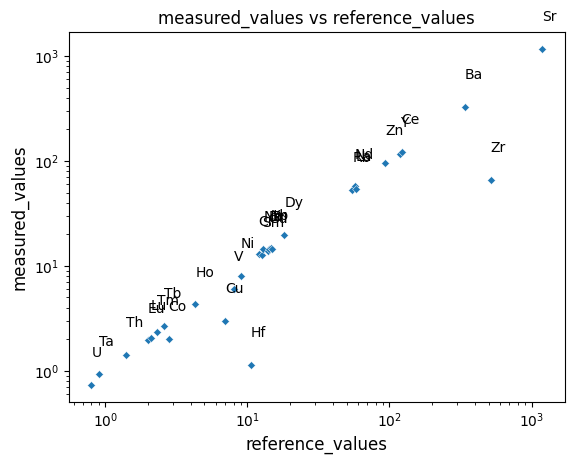

In [12]:
make_scatter_plot(
    df_merged, 
    'reference_values',
    'measured_values',
    'chemical_species'
)


<font color="green"><b>TRY IT YOURSELF:</b> 
<ol style="color: green";">
<li>Read in the data for standard SY-2 from SY-2.csv in the Data_for_exercises folder.</li>
<li>Read in the data for measured SY-2 from the trace element csv the Data_for_exercises folder.</li>
 <li>Find the columns that are common to SY-2.csv and the measured trace element data. Select only the common columns from each dataframe.</li>
 <li>Transpose both dataframes using the transpose_data function. </li>
<li>Merge the transposed dataframes</li>
<li>Plot the measured versus reference value using the make_scatter_plot function </li>
</ol>  

In [13]:
# write your code here

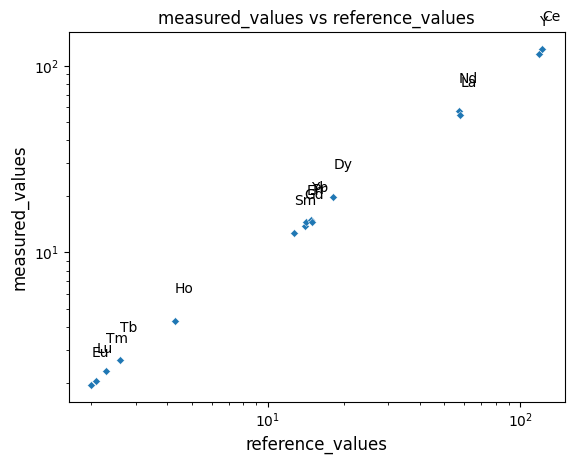

In [14]:
# Expand to see how it's done

#import the data into pandas
measured_SY2 = pd.read_csv('https://raw.githubusercontent.com/TarynScharf/PythonWorkshop/refs/heads/main/SEG/Data_for_exercises/DH%201%262%20trace%20elements.csv',header = 4,skiprows=range(5, 34), nrows=1)
standard_SY2 = pd.read_csv('https://raw.githubusercontent.com/TarynScharf/PythonWorkshop/refs/heads/main/SEG/Data_for_exercises/SY-2.csv')

#find the columns in common and filter each dataframe for the common columns
common_cols = standard_SY2.columns.intersection(measured_SY2.columns)
standard_SY2_common = standard_SY4[common_cols]
measured_SY2_common = measured_SY4[common_cols]

#transpose the two dataframes using the transpose_data function
standard_SY2_transposed = transpose_data(standard_SY2_common,['chemical_species','reference_values'])
measured_SY2_transposed = transpose_data(measured_SY2_common,['chemical_species', 'measured_values'])

#merge the two dataframes
df_merged_SY2 = pd.merge(standard_SY2_transposed, measured_SY2_transposed, on='chemical_species', how='inner')
df_merged_SY2.sort_values(by='reference_values', inplace=True)

#Create a scatter plot using the make_scatter_plot function
make_scatter_plot(df_merged_SY2,
                  'reference_values',
                  'measured_values',
                  'chemical_species'
                 )

## Example 2: Plot chemistry versus depth
In this example we will:
1.  Load the major element data
2.  Create a new pandas column, to hold interval mid-point.
3.  Plot chemistry versus depth (sampling interval midpoint)
4.  See how matplotlib axes may be inverted
5.  See how to share a common axis between two plots

Our depth plot will look like this:


![depth_plots.png](https://raw.githubusercontent.com/TarynScharf/PythonWorkshop/refs/heads/main/SEG/NotebookImages/depth_profiles.png)

In [15]:
#Load the major element data

major_elements = pd.read_csv('https://raw.githubusercontent.com/TarynScharf/PythonWorkshop/refs/heads/main/SEG/Data_for_exercises/DH1%262%20major%20elements.csv', header = 4)
major_elements.head()


,sample numbers,Location,Interval,Al2O3,CaO,Fe2O3,K2O,MgO,MnO,Na2O,P2O5,SO3,SiO2,TiO2,LOI,Total
0,414001,DH1,104.3-104.5,14.99,7.88,10.42,1.72,5.10,0.19,3.33,0.15,x.06,52.71,1.28,1.65,99.4
1,414002,DH1,149.5-149.7,15.46,8.17,9.32,1.70,5.04,0.13,3.03,0.14,0.14,54.90,0.98,1.24,100.2
2,414003,DH1,198.65-198.85,14.23,7.13,9.57,1.95,4.98,0.15,3.46,0.16,0.14,55.66,1.07,1.37,99.8
3,414004,DH1,250.25-250.45,15.67,9.02,9.25,1.54,5.01,0.14,2.48,0.14,0.02,54.51,1.02,0.85,99.7
4,414005,DH1,308.4-308.65,14.23,6.92,11.22,2.27,5.08,0.18,4.33,0.16,0.05,52.66,1.35,1.50,99.9


In [16]:
#Create a new pandas column that will hold the calculated sampling intersection midpoint

def calculate_midpoint(row):
    from_depth = float(row['Interval'].split('-')[0])
    to_depth = float(row['Interval'].split('-')[1])
    midpoint = from_depth + (to_depth - from_depth)/2
    return midpoint

major_elements['depth'] = major_elements.apply(calculate_midpoint, axis=1)
major_elements.head()

,sample numbers,Location,Interval,Al2O3,CaO,Fe2O3,K2O,MgO,MnO,Na2O,P2O5,SO3,SiO2,TiO2,LOI,Total,depth
0,414001,DH1,104.3-104.5,14.99,7.88,10.42,1.72,5.10,0.19,3.33,0.15,x.06,52.71,1.28,1.65,99.4,104.400
1,414002,DH1,149.5-149.7,15.46,8.17,9.32,1.70,5.04,0.13,3.03,0.14,0.14,54.90,0.98,1.24,100.2,149.600
2,414003,DH1,198.65-198.85,14.23,7.13,9.57,1.95,4.98,0.15,3.46,0.16,0.14,55.66,1.07,1.37,99.8,198.750
3,414004,DH1,250.25-250.45,15.67,9.02,9.25,1.54,5.01,0.14,2.48,0.14,0.02,54.51,1.02,0.85,99.7,250.350
4,414005,DH1,308.4-308.65,14.23,6.92,11.22,2.27,5.08,0.18,4.33,0.16,0.05,52.66,1.35,1.50,99.9,308.525


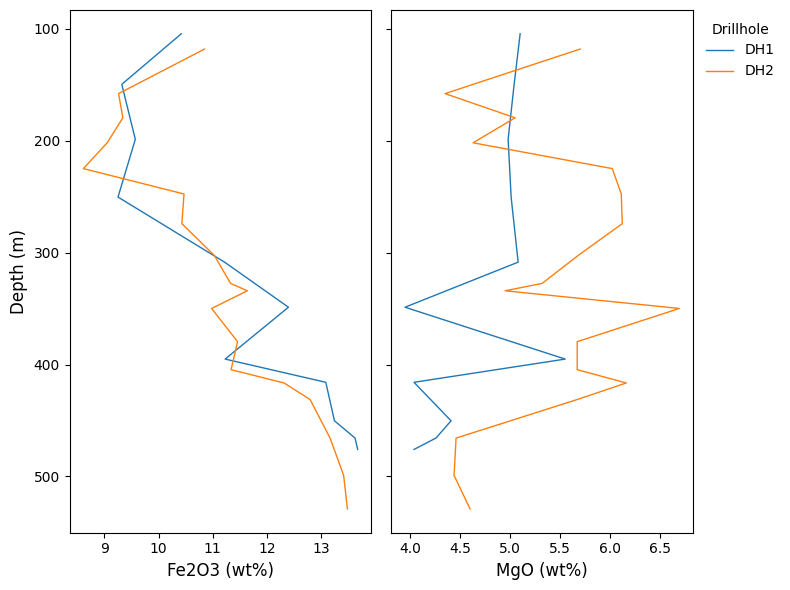

In [17]:
#Create a matplotlib plot that contains two element-vs-depth subplots, placed side-by-side

def plot_major_element_versus_depth(dataframe, element1, element2):
    fig, ax = plt.subplots(1, 2, figsize=(8,6), sharey=True)

    for drillhole in dataframe['Location'].unique():
        
        #filter out the data for the relevant drillhole
        drillhole_data = dataframe[dataframe['Location']==drillhole]

        #plot the element_1 data for the drillhole
        ax[0].plot(drillhole_data[element1], drillhole_data['depth'], label = drillhole)
        ax[0].set_xlabel(f'{element1} (wt%)')
        ax[0].set_ylabel('Depth (m)')
        
        # plot the element_2 data for the drillhole
        ax[1].plot(drillhole_data[element2], drillhole_data['depth'], label = drillhole)
        ax[1].set_xlabel(f'{element2} (wt%)')
        ax[1].legend(title='Drillhole')
    
    ax[0].invert_yaxis()

    plt.tight_layout()
    plt.show()
        
plot_major_element_versus_depth(major_elements, 'Fe2O3', 'MgO')

 <font color="green"><b>TRY IT YOURSELF:</b> Call the plot_major_element_versus_depth function to plot Al2O3 and K2O with depth. </font>  

In [18]:
# write your code here

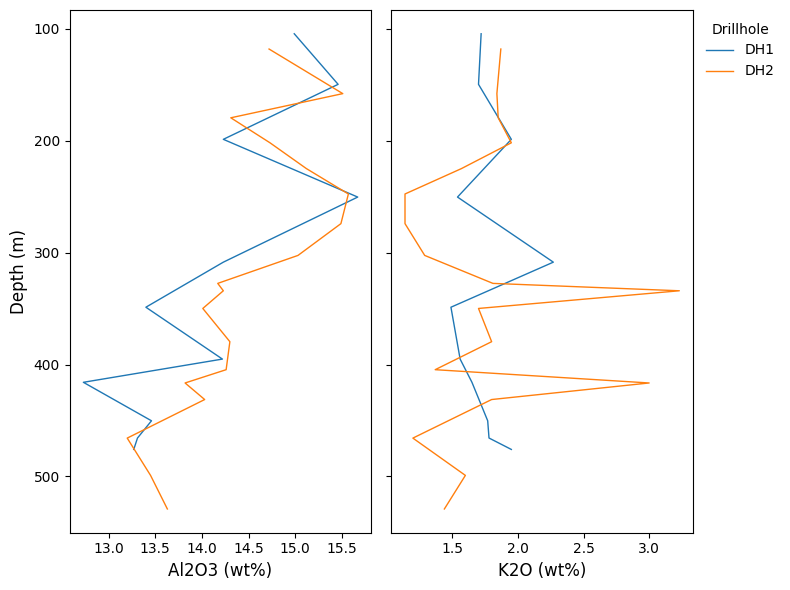

In [19]:
# Expand to see how it's done

plot_major_element_versus_depth(major_elements, 'Al2O3', 'K2O')

Let's change the asthetics of this plot

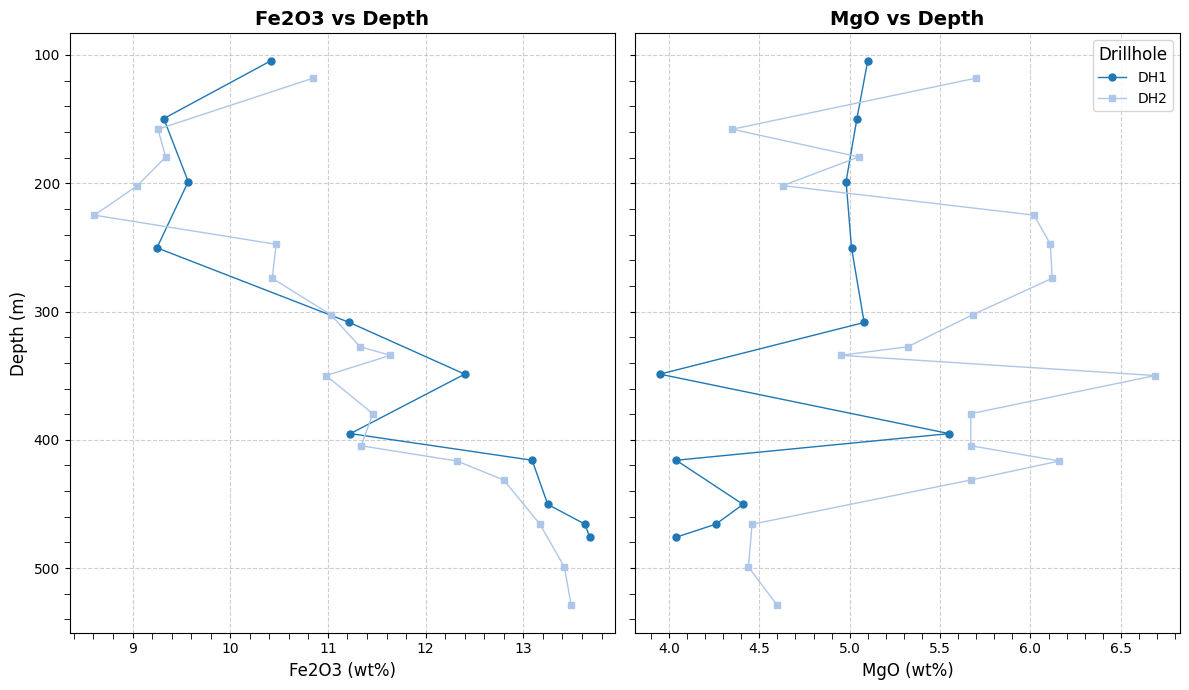

In [20]:
def plot_major_element_versus_depth(dataframe, element1, element2):
    fig, ax = plt.subplots(1, 2, figsize=(12, 7), sharey=True)

    # Define colors and markers cycles
    colours = plt.cm.tab20.colors  # Matplotlib has several colour maps. This one has 20 colours. You can read more here: https://matplotlib.org/stable/users/explain/colors/colormaps.html
    markers = ['o', 's'] # matplotlib has different marker styles. You can read more here: https://matplotlib.org/stable/api/markers_api.html

    drillholes = dataframe['Location'].unique()
    num_colors = len(colours)
    num_markers = len(markers)

    for index, drillhole in enumerate(drillholes):
        drillhole_data = dataframe[dataframe['Location'] == drillhole]

        colour = colours[index]
        marker = markers[index]

        ax[0].plot(drillhole_data[element1], drillhole_data['depth'],label=drillhole, color=colour, marker=marker, linestyle='-', markersize=5)
        ax[1].plot(drillhole_data[element2], drillhole_data['depth'],label=drillhole, color=colour, marker=marker, linestyle='-', markersize=5)

    # Axes labels
    ax[0].set_xlabel(f'{element1} (wt%)', fontsize=12)
    ax[1].set_xlabel(f'{element2} (wt%)', fontsize=12)
    ax[0].set_ylabel('Depth (m)', fontsize=12)

    # Axes titles
    ax[0].set_title(f'{element1} vs Depth', fontsize=14, fontweight='bold')
    ax[1].set_title(f'{element2} vs Depth', fontsize=14, fontweight='bold')

    # Customising tick marks
    for axis in ax:
        axis.grid(True, linestyle='--', alpha=0.6)
        axis.minorticks_on()
        axis.tick_params(axis='both', which='major', labelsize=10)
        axis.tick_params(axis='both', which='minor', length=4)

    ax[1].legend(title='Drillhole', fontsize=10, title_fontsize=12, loc='upper right',frameon=True, facecolor='white')
    ax[0].invert_yaxis()
    plt.tight_layout()
    plt.show()

plot_major_element_versus_depth(major_elements, 'Fe2O3', 'MgO')

## Example 3: Creating geochemical plots - oxide-oxide plot, TAS diagram, ternary diagram, spidergram

We'll use a dataset of mafic extrusive igneous rocks in Western Australia, downloaded from the Ausgeochem online portal.

![ausgeochemsamples.png](https://raw.githubusercontent.com/TarynScharf/PythonWorkshop/refs/heads/main/SEG/NotebookImages/ausgeochemsamples.png)

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/TarynScharf/PythonWorkshop/refs/heads/main/SEG/Data_for_exercises/Rock_sample_geochem.csv')
df.head()

,Unnamed: 0,sample_name,sample_material,sample_type,latitude,longitude,elevation_ground,min_depth,max_depth,location_type,...,MnO,CaO,TiO2,Fe2O3,K2O,Cr2O3,FeO,Al2O3,Na2O,MgO
0,0,LITH03626751-BD001-040.00,Dacite,Rock,-30.190000,121.82000,365,-40.0,-40.0,Unknown,...,0.16,10.43,0.76,0.71,0.13,0.006328,5.76,16.21,3.20,3.29
1,1,LITH03626751-KJS318-2,Basalt,Rock,-29.290000,120.56000,442,0.0,0.0,Unknown,...,0.23,14.76,0.34,1.09,0.09,0.270000,8.88,7.21,0.58,16.29
2,4,LITH03626751-AMP-HM-120524-023A,Basalt,Rock,-21.408455,117.15948,337,0.0,0.0,Unknown,...,0.03,5.52,0.70,0.32,1.70,0.001206,2.59,12.36,2.03,0.03
3,6,LITH03626751-AMP-HM-120529-056,Basalt,Rock,-22.647785,117.77127,805,0.0,0.0,Unknown,...,0.13,10.92,0.93,0.96,0.55,0.010000,7.85,16.52,1.81,4.19
4,9,LITH03626751-GSWA-165366,Basalt,Rock,-28.070000,119.22000,523,0.0,0.0,Unknown,...,0.10,5.64,1.27,1.32,0.06,0.006319,10.68,15.26,4.93,9.09


We can get rid of unwanted columnns using the 'drop' method. 

In [22]:
df.drop(columns = ['location_type', 'location_comment'], inplace=True)
df.head()

,Unnamed: 0,sample_name,sample_material,sample_type,latitude,longitude,elevation_ground,min_depth,max_depth,location_name,...,MnO,CaO,TiO2,Fe2O3,K2O,Cr2O3,FeO,Al2O3,Na2O,MgO
0,0,LITH03626751-BD001-040.00,Dacite,Rock,-30.190000,121.82000,365,-40.0,-40.0,Binti Binti,...,0.16,10.43,0.76,0.71,0.13,0.006328,5.76,16.21,3.20,3.29
1,1,LITH03626751-KJS318-2,Basalt,Rock,-29.290000,120.56000,442,0.0,0.0,Kurrajong,...,0.23,14.76,0.34,1.09,0.09,0.270000,8.88,7.21,0.58,16.29
2,4,LITH03626751-AMP-HM-120524-023A,Basalt,Rock,-21.408455,117.15948,337,0.0,0.0,Hamersley Basin North,...,0.03,5.52,0.70,0.32,1.70,0.001206,2.59,12.36,2.03,0.03
3,6,LITH03626751-AMP-HM-120529-056,Basalt,Rock,-22.647785,117.77127,805,0.0,0.0,Pipeline,...,0.13,10.92,0.93,0.96,0.55,0.010000,7.85,16.52,1.81,4.19
4,9,LITH03626751-GSWA-165366,Basalt,Rock,-28.070000,119.22000,523,0.0,0.0,Sandstone Belt,...,0.10,5.64,1.27,1.32,0.06,0.006319,10.68,15.26,4.93,9.09


### Example 3.1: Data preparation
- Filter the data to extract major oxide columns.
- Get an overview  of the data: how many rows, missing values etc.
- Drop rows with missing values
- Replace zeros
- Execute closure of oxides so that compositional data sums to 100

We can filter data by row and column index using the .iloc method. (iloc standads for interger-location)

In [23]:
df.iloc[0:3, [42, 47, 51]]

,P2O5,Fe2O3,Al2O3
0,0.180000,0.71,16.21
1,0.007176,1.09,7.21
2,0.100000,0.32,12.36


<font color="green"><b>TRY IT YOURSELF:</b> Instead of counting the column headers to get the index of the column of interest, we could get the indices of interest programmatically. Below, we extract the column indexes programmatically. Use these variables to filter out the SiO2, K2O and Na2O data.</font>  


In [24]:
index_of_SiO2 = df.columns.get_loc('SiO2')
index_of_Na2O = df.columns.get_loc('Na2O')
index_of_K2O = df.columns.get_loc('K2O')

print(f'index of SiO2: {index_of_SiO2}')
print(f'index of Na2O: {index_of_Na2O}')
print(f'index of K2O: {index_of_K2O}')

#Type your code here. Hint: use the .iloc method



index of SiO2: 43
index of Na2O: 52
index of K2O: 48


In [25]:
# Expand to see how it's done
index_of_SiO2 = df.columns.get_loc('SiO2')
index_of_Na2O = df.columns.get_loc('Na2O')
index_of_K2O = df.columns.get_loc('K2O')

df.iloc[0:3, [index_of_SiO2, index_of_Na2O, index_of_K2O]]

,SiO2,Na2O,K2O
0,59.11,3.20,0.13
1,50.14,0.58,0.09
2,73.04,2.03,1.70


We can also filter by column and row name using the .loc method. (loc stands for location)

In [26]:
element_oxides = ['SiO2', 'Al2O3', 'Fe2O3', 'CaO', 'MgO', 'Na2O', 'K2O', 'MnO', 'TiO2', 'P2O5', 'Cr2O3']
oxides = df.loc[:,element_oxides]
oxides.head()

,SiO2,Al2O3,Fe2O3,CaO,MgO,Na2O,K2O,MnO,TiO2,P2O5,Cr2O3
0,59.11,16.21,0.71,10.43,3.29,3.20,0.13,0.16,0.76,0.180000,0.006328
1,50.14,7.21,1.09,14.76,16.29,0.58,0.09,0.23,0.34,0.007176,0.270000
2,73.04,12.36,0.32,5.52,0.03,2.03,1.70,0.03,0.70,0.100000,0.001206
3,55.93,16.52,0.96,10.92,4.19,1.81,0.55,0.13,0.93,0.140000,0.010000
4,51.44,15.26,1.32,5.64,9.09,4.93,0.06,0.10,1.27,0.140000,0.006319


Pyrolite has some built-in methods for quick data filtering of geochem data. For example, you can easily filter out the oxide and REE columns.

In [27]:
oxides_pyrochem = df.pyrochem.oxides
oxides_pyrochem.head()

,P2O5,SiO2,MnO,CaO,TiO2,Fe2O3,K2O,Cr2O3,FeO,Al2O3,Na2O,MgO
0,0.180000,59.11,0.16,10.43,0.76,0.71,0.13,0.006328,5.76,16.21,3.20,3.29
1,0.007176,50.14,0.23,14.76,0.34,1.09,0.09,0.270000,8.88,7.21,0.58,16.29
2,0.100000,73.04,0.03,5.52,0.70,0.32,1.70,0.001206,2.59,12.36,2.03,0.03
3,0.140000,55.93,0.13,10.92,0.93,0.96,0.55,0.010000,7.85,16.52,1.81,4.19
4,0.140000,51.44,0.10,5.64,1.27,1.32,0.06,0.006319,10.68,15.26,4.93,9.09


 <font color="green"><b>TRY IT YOURSELF:</b> Select rare earth elements using df.pyrochem.REE. Print out the results using the .head() method</font>  

In [28]:
# Write your code here

In [29]:
# Expand to see how it's done

REE_pyrochem = df.pyrochem.REE
REE_pyrochem.head()

,La,Ce,Pr,Nd,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu
0,14.60,33.23,3.92,16.11,3.42,1.08,3.12,0.54,3.32,0.68,1.91,0.28,1.76,0.31
1,5.12,2.46,1.16,6.76,2.20,0.87,4.71,0.76,5.12,1.29,3.69,NaN,2.76,0.45
2,16.48,32.86,3.79,15.24,3.36,0.82,3.63,0.57,3.76,0.82,2.32,0.28,2.00,0.28
3,23.84,47.79,5.86,22.81,4.77,1.10,4.76,0.82,5.06,1.18,3.33,0.42,3.10,0.48
4,6.82,17.97,2.46,12.74,3.80,1.27,4.96,0.86,4.88,1.04,3.01,NaN,2.54,0.35


You can quickly assess the numerical data to understand data max, min, average etc., and missing data using the .describe() and .info() methods. Let's assess the oxide data.

In [30]:
oxides.describe()

,SiO2,Al2O3,Fe2O3,CaO,MgO,Na2O,K2O,MnO,TiO2,P2O5,Cr2O3
count,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000,435.000000
mean,53.750644,10.074161,0.761804,5.423517,18.758644,1.707586,0.674667,0.153486,0.553356,0.075739,0.170548
std,9.955704,6.510317,0.593940,4.229842,17.901724,1.969739,1.008229,0.359746,0.435682,0.132355,0.228321
min,36.820000,0.060000,0.000000,0.000000,0.030000,0.010000,0.010000,0.007208,0.010000,0.000000,0.000000
25%,45.625000,3.715000,0.270000,1.405000,4.275000,0.080000,0.050000,0.075000,0.115000,0.000000,0.010000
50%,51.750000,12.400000,0.780000,5.030000,9.660000,1.250000,0.170000,0.140000,0.560000,0.010000,0.070000
75%,59.335000,15.565000,1.150000,8.475000,34.830000,2.795000,1.010000,0.180000,0.820000,0.125000,0.250000
max,98.450000,24.490000,4.540000,18.100000,52.990000,10.110000,7.210000,7.460000,2.350000,1.130000,1.760000


In [31]:
oxides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SiO2    435 non-null    float64
 1   Al2O3   435 non-null    float64
 2   Fe2O3   435 non-null    float64
 3   CaO     435 non-null    float64
 4   MgO     435 non-null    float64
 5   Na2O    435 non-null    float64
 6   K2O     435 non-null    float64
 7   MnO     435 non-null    float64
 8   TiO2    435 non-null    float64
 9   P2O5    435 non-null    float64
 10  Cr2O3   435 non-null    float64
dtypes: float64(11)
memory usage: 37.5 KB


### What do we do with zero values? When values are below detection limit...

Some columns contain zero values. Zero values can be problematic in calculations and statistical analysis! There are many ways to handle zeros. 
- Delete all rows or columns with zero values. This can cause us to lose a lot of data, though!
- We can replace zeros with a small value, or some fraction of detection limit.
- We can impute the missing values.

In [32]:
#Let's replace zero values with very small values. Similarly, we could replace the values with e.g. half detection limit
oxides_replaced = oxides.replace(0, 1e-10)
oxides_replaced.describe()

,SiO2,Al2O3,Fe2O3,CaO,MgO,Na2O,K2O,MnO,TiO2,P2O5,Cr2O3
count,435.000000,435.000000,4.350000e+02,4.350000e+02,435.000000,435.000000,435.000000,435.000000,435.000000,4.350000e+02,4.350000e+02
mean,53.750644,10.074161,7.618042e-01,5.423517e+00,18.758644,1.707586,0.674667,0.153486,0.553356,7.573853e-02,1.705484e-01
std,9.955704,6.510317,5.939403e-01,4.229842e+00,17.901724,1.969739,1.008229,0.359746,0.435682,1.323555e-01,2.283206e-01
min,36.820000,0.060000,1.000000e-10,1.000000e-10,0.030000,0.010000,0.010000,0.007208,0.010000,1.000000e-10,1.000000e-10
25%,45.625000,3.715000,2.700000e-01,1.405000e+00,4.275000,0.080000,0.050000,0.075000,0.115000,1.000000e-10,1.000000e-02
50%,51.750000,12.400000,7.800000e-01,5.030000e+00,9.660000,1.250000,0.170000,0.140000,0.560000,1.000000e-02,7.000000e-02
75%,59.335000,15.565000,1.150000e+00,8.475000e+00,34.830000,2.795000,1.010000,0.180000,0.820000,1.250000e-01,2.500000e-01
max,98.450000,24.490000,4.540000e+00,1.810000e+01,52.990000,10.110000,7.210000,7.460000,2.350000,1.130000e+00,1.760000e+00


In [33]:
#If we're replacing the zero values, we'll need to ensure that the compositional data still sum to 100. This means we need to renormalise the data.
oxides_renormalised = pyrolite.comp.codata.renormalise(oxides_replaced, scale=100)

#We'll create a 'sum' column, just to demonstrate that the data sum to 100
oxides_renormalised['sum'] = oxides_renormalised.sum(axis=1, skipna=False)

#Visualise the data
oxides_renormalised.head()


,SiO2,Al2O3,Fe2O3,CaO,MgO,Na2O,K2O,MnO,TiO2,P2O5,Cr2O3,sum
0,62.758578,17.210566,0.753825,11.073794,3.493076,3.397521,0.138024,0.169876,0.806911,0.191111,0.006719,100.0
1,55.094557,7.922452,1.197708,16.218501,17.899687,0.637312,0.098893,0.252727,0.373597,0.007885,0.296680,100.0
2,76.217344,12.897678,0.333920,5.760128,0.031305,2.118308,1.773952,0.031305,0.730451,0.104350,0.001258,100.0
3,60.734065,17.938973,1.042458,11.857965,4.549897,1.965469,0.597242,0.141166,1.009882,0.152025,0.010859,100.0
4,57.631774,17.096829,1.478887,6.318880,10.184153,5.523418,0.067222,0.112037,1.422868,0.156852,0.007079,100.0


In [34]:
#remove the now-unwanted sum column
oxides_renormalised.drop(columns = 'sum', inplace=True)
oxides_renormalised.head()

,SiO2,Al2O3,Fe2O3,CaO,MgO,Na2O,K2O,MnO,TiO2,P2O5,Cr2O3
0,62.758578,17.210566,0.753825,11.073794,3.493076,3.397521,0.138024,0.169876,0.806911,0.191111,0.006719
1,55.094557,7.922452,1.197708,16.218501,17.899687,0.637312,0.098893,0.252727,0.373597,0.007885,0.296680
2,76.217344,12.897678,0.333920,5.760128,0.031305,2.118308,1.773952,0.031305,0.730451,0.104350,0.001258
3,60.734065,17.938973,1.042458,11.857965,4.549897,1.965469,0.597242,0.141166,1.009882,0.152025,0.010859
4,57.631774,17.096829,1.478887,6.318880,10.184153,5.523418,0.067222,0.112037,1.422868,0.156852,0.007079


## Example 3.2: Creating a scatterplot of whole-rock oxides

Let's create a scatterplot of CaO versus MgO

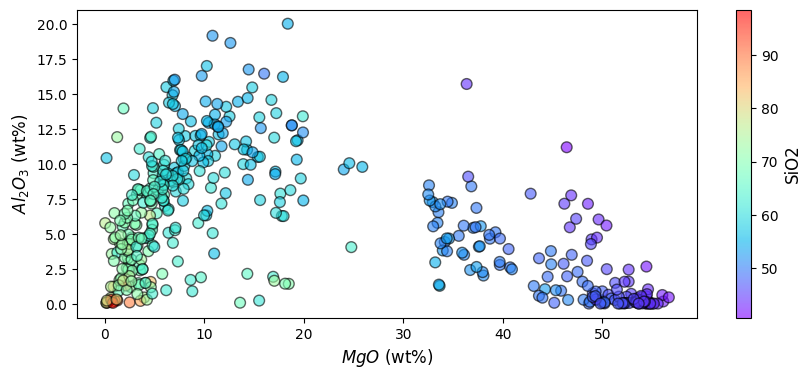

In [35]:
fig, axis = plt.subplots(1,1, figsize = (10,4))

#Plot oxides
oxide_scatter_plot = axis.scatter(
    oxides_renormalised["MgO"], # x-variable
    oxides_renormalised["CaO"], # y-variable
    marker="o",
    c=oxides_renormalised["SiO2"],
    s=60,
    cmap='rainbow',
    edgecolors='black',
    alpha = 0.6
)

colour_bar = plt.colorbar(oxide_scatter_plot, ax=axis)
colour_bar.set_label('SiO2')

axis.set_xlabel("$MgO$ (wt%)")
axis.set_ylabel("$Al_{2}O_{3}$ (wt%)");

 <font color="green"><b>TRY IT YOURSELF:</b> Create a scatterplot of TiO2 (y) versus Fe2O3 (x). Colour by MgO using cmap='gnuplot2'</font>  

In [36]:
# Write your code here


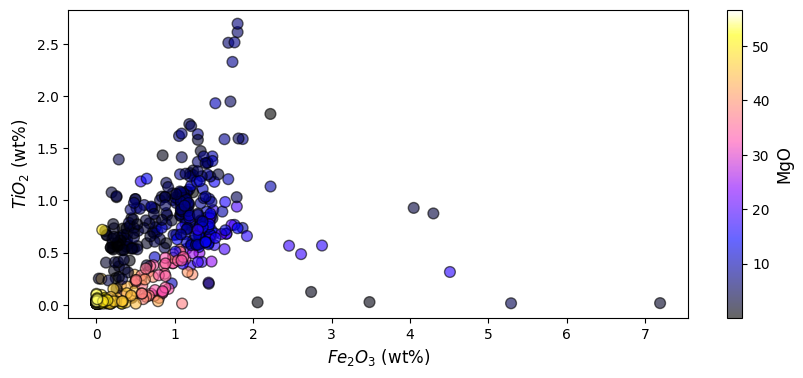

In [37]:
# Expand to see how it's done

fig, axis = plt.subplots(1,1, figsize = (10,4))

oxide_scatter_plot = axis.scatter(
    oxides_renormalised["Fe2O3"], # x-variable
    oxides_renormalised["TiO2"], # y-variable
    marker="o",
    c=oxides_renormalised["MgO"],
    s=60,
    cmap='gnuplot2',
    edgecolors='black',
    alpha = 0.6
)

colour_bar = plt.colorbar(oxide_scatter_plot, ax=axis)
colour_bar.set_label('MgO')

axis.set_xlabel("$Fe_{2}O_{3}$ (wt%)")
axis.set_ylabel("$TiO_{2}$ (wt%)");

## Example 3.3: Classifying data using a TAS diagram


Let's pause here for a moment and discuss what we're about to do:
- We're going to to use the renormalised oxide data to plot our data points on a TAS diagram.
- Using the TAS diagram, we'll be able to **classify** our datapoints into volcanic rock types.
- We will filter out the volcanic rock types, based on this classification. The filtered data will be plotted on a spidergram.
- Spidergrams plot the REE content. This means we will need both the **oxide and the REE data**! However, in the previous exercise, we extracted the oxide data only...
- Let's fix this by creating a dataset that includes both the oxide and REE data, with zeros replaced, and the oxides renormalised.

This is how we'll do it:

In [38]:
#Firstly, let's take our original dataframe, and replace all the zeros with small values, just like we did before. 
#The difference is that we will do this to the full dataset, not only the oxide subset

df_no_zeros = df.replace(0, 1e-10)
df_no_zeros.describe() #No columns have a min of zero anymore!

,Unnamed: 0,latitude,longitude,elevation_ground,min_depth,max_depth,Er,Eu,Dy,Zr,...,MnO,CaO,TiO2,Fe2O3,K2O,Cr2O3,FeO,Al2O3,Na2O,MgO
count,4.350000e+02,435.000000,435.000000,435.000000,4.350000e+02,4.350000e+02,174.000000,172.000000,169.000000,2.580000e+02,...,435.000000,4.350000e+02,435.000000,4.350000e+02,435.000000,4.350000e+02,435.000000,435.000000,435.000000,435.000000
mean,3.756759e+02,-26.766518,118.350146,460.443678,-9.752552e+01,-9.752368e+01,2.346667,1.070291,3.837456,1.112356e+02,...,0.153486,5.423517e+00,0.553356,7.618042e-01,0.674667,1.705484e-01,7.703793,10.074161,1.707586,18.758644
std,2.128097e+02,9.071775,13.118880,97.896298,1.866526e+02,1.866468e+02,2.040256,0.804813,2.827887,7.586078e+01,...,0.359746,4.229842e+00,0.435682,5.939403e-01,1.008229,2.283206e-01,3.976793,6.510317,1.969739,17.901724
min,1.000000e-10,-33.570000,21.910000,52.000000,-8.520000e+02,-8.520000e+02,0.050000,0.030000,0.100000,1.000000e-10,...,0.007208,1.000000e-10,0.010000,1.000000e-10,0.010000,1.000000e-10,0.090000,0.060000,0.010000,0.030000
25%,1.930000e+02,-30.390000,119.680000,376.000000,-1.270000e+02,-1.270000e+02,1.040000,0.635000,1.900000,5.300000e+01,...,0.075000,1.405000e+00,0.115000,2.700000e-01,0.050000,1.000000e-02,5.195000,3.715000,0.080000,4.275000
50%,3.680000e+02,-27.210000,120.350000,474.000000,1.000000e-10,1.000000e-10,1.905000,0.925000,3.320000,1.113900e+02,...,0.140000,5.030000e+00,0.560000,7.800000e-01,0.170000,7.000000e-02,7.910000,12.400000,1.250000,9.660000
75%,5.695000e+02,-26.880000,121.080000,503.000000,1.000000e-10,1.000000e-10,3.265000,1.310000,5.190000,1.479050e+02,...,0.180000,8.475000e+00,0.820000,1.150000e+00,1.010000,2.500000e-01,9.690000,15.565000,2.795000,34.830000
max,7.240000e+02,70.040000,122.080000,861.000000,1.000000e-10,1.000000e-10,20.200000,5.820000,24.560000,6.446500e+02,...,7.460000,1.810000e+01,2.350000,4.540000e+00,7.210000,1.760000e+00,36.840000,24.490000,10.110000,52.990000


In [39]:
#Next, we want to make sure our oxides are normalised to 100, so that we can plot the data on a TAS diagram.
#Pyrolite actually allows us to normalise a subset of our columns, if we provide the column names

df_normalised_oxides = pyrolite.comp.codata.renormalise(
    df = df_no_zeros, 
    components = df.pyrochem.list_oxides, # this is another pyrolite function, to extract oxide columns from the dataframe
    scale=100
)

# So how do we know that worked? Let's take a look:
oxides = df_normalised_oxides.pyrochem.oxides.copy() #let's isolate the oxide columns in our df_normalised_oxides, and make a copy of it
oxides['sum'] = oxides.sum(axis=1) #manually create a sum column, where we total the oxide values
oxides.head() # Visualise the result. Oxides sum to 100!


,P2O5,SiO2,MnO,CaO,TiO2,Fe2O3,K2O,Cr2O3,FeO,Al2O3,Na2O,MgO,sum
0,0.180097,59.141742,0.160086,10.435601,0.760408,0.710381,0.130070,0.006332,5.763093,16.218705,3.201718,3.291767,100.0
1,0.007184,50.196634,0.230260,14.776672,0.340384,1.091231,0.090102,0.270305,8.890030,7.218144,0.580655,16.308400,100.0
2,0.101604,74.211649,0.030481,5.608547,0.711229,0.325133,1.727270,0.001225,2.631547,12.558269,2.062564,0.030481,100.0
3,0.140084,55.963578,0.130078,10.926556,0.930558,0.960576,0.550330,0.010006,7.854713,16.529918,1.811087,4.192516,100.0
4,0.140089,51.472778,0.100064,5.643594,1.270809,1.320841,0.060038,0.006323,10.686805,15.269724,4.933141,9.095792,100.0


In [40]:
#TAS diagrams plot alkalis versus silica. Let's create a new column to contain total Na2O + K2O
df_normalised_oxides["Na2O + K2O"] = df_normalised_oxides["Na2O"] + df_normalised_oxides["K2O"]

#Other ways to execute the same calculation:
df_normalised_oxides["Na2O + K2O"] = df_normalised_oxides.eval("Na2O + K2O")
df_normalised_oxides["Na2O + K2O"] = df_normalised_oxides.apply(lambda x: x["K2O"]+x["Na2O"], axis=1)

df_normalised_oxides.head()

,Unnamed: 0,sample_name,sample_material,sample_type,latitude,longitude,elevation_ground,min_depth,max_depth,location_name,...,CaO,TiO2,Fe2O3,K2O,Cr2O3,FeO,Al2O3,Na2O,MgO,Na2O + K2O
0,1.000000e-10,LITH03626751-BD001-040.00,Dacite,Rock,-30.190000,121.82000,365,-4.000000e+01,-4.000000e+01,Binti Binti,...,10.435601,0.760408,0.710381,0.130070,0.006332,5.763093,16.218705,3.201718,3.291767,3.331788
1,1.000000e+00,LITH03626751-KJS318-2,Basalt,Rock,-29.290000,120.56000,442,1.000000e-10,1.000000e-10,Kurrajong,...,14.776672,0.340384,1.091231,0.090102,0.270305,8.890030,7.218144,0.580655,16.308400,0.670757
2,4.000000e+00,LITH03626751-AMP-HM-120524-023A,Basalt,Rock,-21.408455,117.15948,337,1.000000e-10,1.000000e-10,Hamersley Basin North,...,5.608547,0.711229,0.325133,1.727270,0.001225,2.631547,12.558269,2.062564,0.030481,3.789834
3,6.000000e+00,LITH03626751-AMP-HM-120529-056,Basalt,Rock,-22.647785,117.77127,805,1.000000e-10,1.000000e-10,Pipeline,...,10.926556,0.930558,0.960576,0.550330,0.010006,7.854713,16.529918,1.811087,4.192516,2.361417
4,9.000000e+00,LITH03626751-GSWA-165366,Basalt,Rock,-28.070000,119.22000,523,1.000000e-10,1.000000e-10,Sandstone Belt,...,5.643594,1.270809,1.320841,0.060038,0.006323,10.686805,15.269724,4.933141,9.095792,4.993180


Pyrolite provides templates for a number of classical geochemistry diagrams. Let's use pyrolite to make a TAS plot.

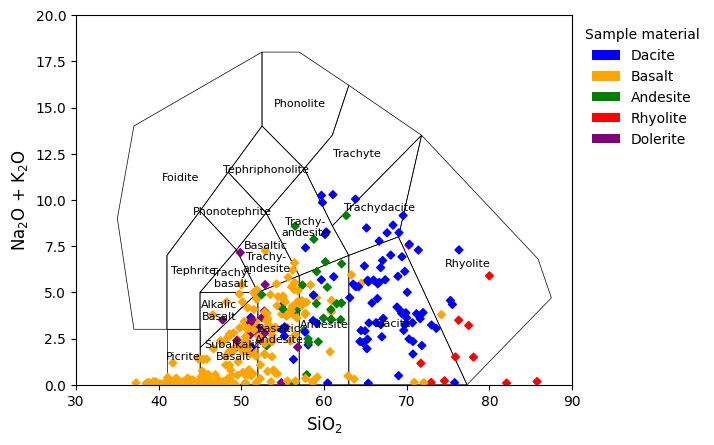

In [41]:
from pyrolite.plot.templates import TAS # Middlemost(1994)
from matplotlib.patches import Patch

#Let's colour the data according to the sample material description in the dataframe
rocknames = df_normalised_oxides['sample_material'].unique()
named_colours = ["blue", "orange", "green", "red", "purple"] #these are matplotlib named colours. There are 5 of them, as there are 5 unique rock names in sample_material
color_to_rock=zip(rocknames, named_colours) #zip returns an iterator of tuples. 
color_to_rock_dictionary = dict(color_to_rock) #this converts the zip to a dictionary, with rock name as key and colour as the value

#Now we can use the TAS template provided by pyrolite
ax = TAS(
    linewidth = 0.5, 
    add_labels = True, 
    which_labels = 'volcanic'
)

ax.scatter(
    df_normalised_oxides["SiO2"],
    df_normalised_oxides["Na2O + K2O"],
    c= df_normalised_oxides["sample_material"].map(color_to_rock_dictionary) #we will use the color_to_rock dictionary to MAP the colours to the datapoints in the dataframe, using the rock name as a key
)

legend_elements = [
    Patch(facecolor=color, label=rock)
    for rock, color in color_to_rock_dictionary.items()
]

ax.legend(handles=legend_elements, title='Sample material')

plt.show()   


We can see that the rock descriptions don't always agree with the TAS classification. Pyrolite also provides the utility to do TAS classification, which will allow us to classify the data points according to which TAS field they fall into. This means we will be able to assign the TAS classification to the data points, in the form of at dataframe column.

In [42]:
from pyrolite.util.classification import TAS as TAS_clf

TAS_classifier = TAS_clf() #instantiate an instance of the TAS classifier
df_normalised_oxides["TAS"] = TAS_classifier.predict(df_normalised_oxides) # assign the classification to a new column called 'TAS'
df_normalised_oxides["Rocknames"] = df_normalised_oxides['TAS'].apply(lambda x: TAS_classifier.fields.get(x, {"name": None})["name"][0])
df_normalised_oxides.head()

,Unnamed: 0,sample_name,sample_material,sample_type,latitude,longitude,elevation_ground,min_depth,max_depth,location_name,...,Fe2O3,K2O,Cr2O3,FeO,Al2O3,Na2O,MgO,Na2O + K2O,TAS,Rocknames
0,1.000000e-10,LITH03626751-BD001-040.00,Dacite,Rock,-30.190000,121.82000,365,-4.000000e+01,-4.000000e+01,Binti Binti,...,0.710381,0.130070,0.006332,5.763093,16.218705,3.201718,3.291767,3.331788,O2,Andesite
1,1.000000e+00,LITH03626751-KJS318-2,Basalt,Rock,-29.290000,120.56000,442,1.000000e-10,1.000000e-10,Kurrajong,...,1.091231,0.090102,0.270305,8.890030,7.218144,0.580655,16.308400,0.670757,Bs,Subalkalic \nBasalt
2,4.000000e+00,LITH03626751-AMP-HM-120524-023A,Basalt,Rock,-21.408455,117.15948,337,1.000000e-10,1.000000e-10,Hamersley Basin North,...,0.325133,1.727270,0.001225,2.631547,12.558269,2.062564,0.030481,3.789834,R,Rhyolite
3,6.000000e+00,LITH03626751-AMP-HM-120529-056,Basalt,Rock,-22.647785,117.77127,805,1.000000e-10,1.000000e-10,Pipeline,...,0.960576,0.550330,0.010006,7.854713,16.529918,1.811087,4.192516,2.361417,O1,Basaltic Andesite
4,9.000000e+00,LITH03626751-GSWA-165366,Basalt,Rock,-28.070000,119.22000,523,1.000000e-10,1.000000e-10,Sandstone Belt,...,1.320841,0.060038,0.006323,10.686805,15.269724,4.933141,9.095792,4.993180,Ba,Alkalic \nBasalt


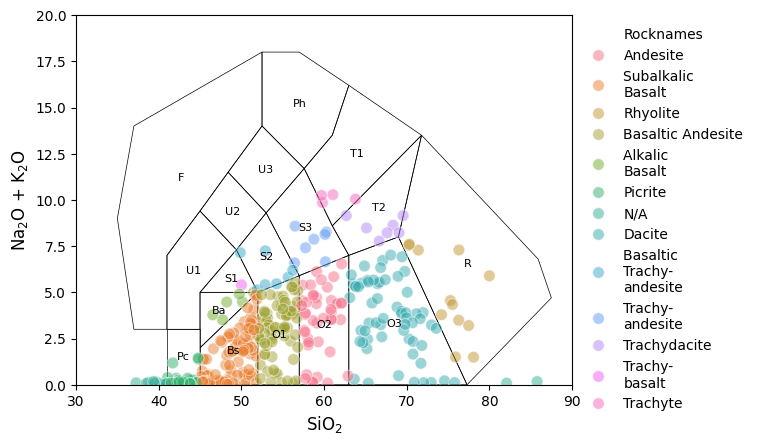

In [43]:
#Let's plot the classified data and colour by the new column containing the TAS classification
ax = TAS(linewidth = 0.5, add_labels = True)
sns.scatterplot(
    x=df_normalised_oxides["SiO2"], 
    y=df_normalised_oxides["Na2O + K2O"], 
    ax=ax, 
    hue = df_normalised_oxides['Rocknames'], 
    s = 70, 
    alpha = 0.5, 
    marker = 'o'
)
plt.show()  

Some of the rock samples do not fall in a TAS field and are thus classified as N/A. Let's remove them and replot the TAS diagram.

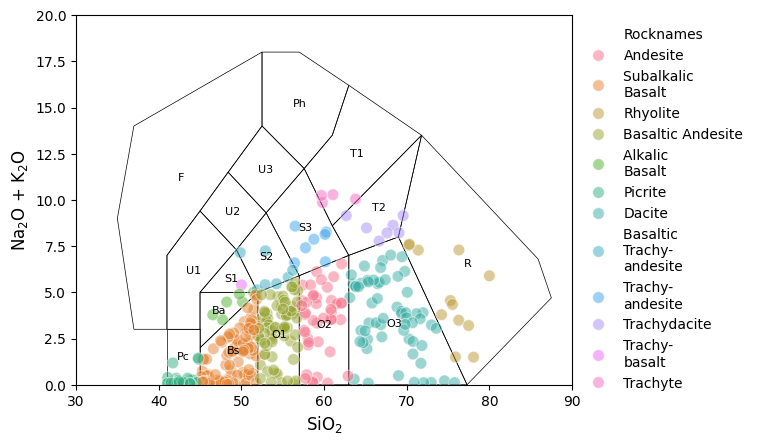

In [44]:
df_classified = df_normalised_oxides[df_normalised_oxides['Rocknames'] !='N/A'].copy()

ax = TAS(linewidth = 0.5, add_labels = True)
sns.scatterplot(
    x=df_classified["SiO2"], 
    y=df_classified["Na2O + K2O"], 
    ax=ax, 
    hue = df_classified['Rocknames'], 
    s = 70, 
    alpha = 0.5, 
    marker = 'o'
)
plt.show()  


We can define our own legend and color scheme on the TAS diagram. Matplotlib has a long list of [named colors](https://matplotlib.org/stable/gallery/color/named_colors.html), but you can also set colors as RGB values or HEX values. 

In [45]:
#Let's create our own colour-to-rocktype mapping (like a legend)
named_colours = [
    "blue", "orange", "green", "red", "purple",
    "brown", "pink", "gray", "olive", "cyan",
    "gold", "teal", "navy", "goldenred", 'darkseagreen'
]

unique_rocktypes = df_classified["Rocknames"].unique()
colour_map = dict(zip(unique_rocktypes, named_colours))

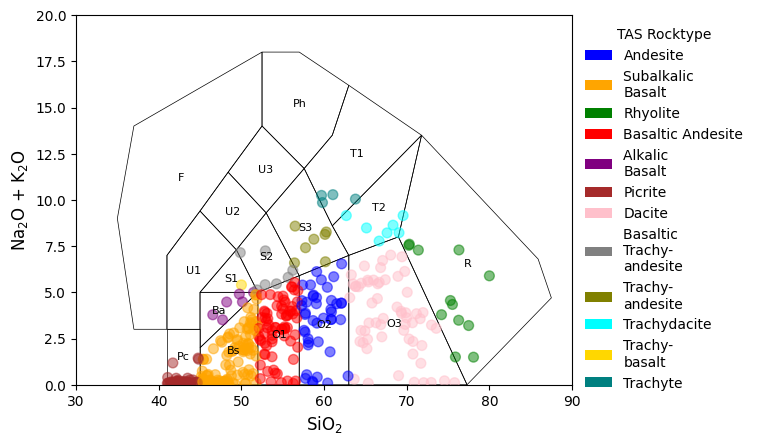

In [46]:
# Now that we have the mapping, we can create a legend
# Usually legends are fairly simple. In this case, because we're using a pyrolite function that calls matplotlib, it's a bit harder.
# We will therefore manually create the legend. In most cases, this isn't required. But it's useful to know it can be done!

from matplotlib.patches import Patch #patches are 2D shapes. This will allow us to draw rectangles filled with colour, to make a legend

ax = TAS(linewidth = 0.5, add_labels = True) # get the TAS plot template

ax.scatter( #plot the data on the templae
    x=df_classified["SiO2"], 
    y=df_classified["Na2O + K2O"], 
    c = df_classified["Rocknames"].map(colour_map), 
    s = 50, 
    alpha = 0.5, 
    marker = 'o'
)

legend_elements = [
    Patch(facecolor=colour, label=rocktype)
    for rocktype, colour in colour_map.items()
]

ax.legend(handles=legend_elements, title="TAS Rocktype")
plt.show()  

## Example 3.4: Ternary plots with pyrolite

Pyrolite has functionality to product ternary scatter plots. Simply provide the three fields to plot, and it will understand that you're creating a ternary diagram.

In [47]:
df_classified.loc[:,"FeOt"] = df_classified.loc[:,"Fe2O3"] * 0.8998
df_classified_norm = pyrolite.comp.codata.renormalise(oxides_of_interest,components =["FeOt","Na2O + K2O", "MgO"], scale=100.0) 
df_merge_rockname_with_norm = pd.merge(df_classified_norm,df_classified[["Rocknames"]], left_index=True, right_index=True, how='inner' )
df_merge_rockname_with_norm

NameError: name 'oxides_of_interest' is not defined

In [ ]:
from matplotlib.lines import Line2D

df_classified.loc[:,"FeOt"] = df_classified.loc[:,"Fe2O3"] * 0.8998
df_classified_norm = pyrolite.comp.codata.renormalise(oxides_of_interest,components =["FeOt","Na2O + K2O", "MgO"], scale=1) 
df_merge_rockname_with_norm = pd.merge(df_classified_norm,df_classified[["Rocknames"]], left_index=True, right_index=True, how='inner' )

fig,ax = plt.subplots()

ax =df_merge_rockname_with_norm.pyroplot.scatter(
    components = ["FeOt","Na2O + K2O", "MgO"],
    marker="o",
    s=50,
    alpha=0.5,
    ax=ax,
    c = df_merge_rockname_with_norm["Rocknames"].map(colour_map),
  )
ax.grid()
#ax.grid(axis="t", linestyle="--") #
#ax.set_ternary_lim(0.0, 0.5, 0, 1, 0.0, 1)  # top axis min  # top axis max  # left axis min  #left axis max  # right axis min  # right axis max


In Python, there is often more than one way to achieve an objective! Pyrolite is not the only way to plot a ternary diagram. Let's plot the ternary diagram using some alternative packages:  
- 'mpltern': In fact, pyrolite uses mpltern, which is built on matplotlib.
- 'plotly': Plotly creates interacive plots, and can also make ternary diagrams  



In [ ]:
#Ternary plot with mpltern (this is what pyrolite uses, under the hood)

import matplotlib.pyplot as plt
import mpltern

ax = plt.subplot(projection="ternary", ternary_sum=1)

ax.scatter(
    df_merge_rockname_with_norm["FeOt"],
    df_merge_rockname_with_norm["Na2O + K2O"], 
    df_merge_rockname_with_norm["MgO"],
    marker="o",
    s=50,
    alpha=0.5,
    c = df_merge_rockname_with_norm["Rocknames"].map(colour_map),
  )
ax.set_tlabel("FeOt")
ax.set_llabel("Na2O + K2O")
ax.set_rlabel("MgO")

ax.grid()

plt.show()


In [ ]:
# Interactive ternary plot using plotly
import plotly.express as px

fig = px.scatter_ternary(
    df_merge_rockname_with_norm, 
    a="FeOt", 
    b="Na2O + K2O", 
    c="MgO",
    color='Rocknames',
    color_discrete_map = colour_map, #I've added colour_map to set the colouring to match the previous examples. Without this, random colours would be assigned.
    width=800, 
    height=800
)

fig.update_traces(marker=dict(size=12, opacity=0.5)) # Here I'm setting the marker size to match that of the previous examples.

fig.show()

 <font color="green"><b>TRY IT YOURSELF:</b> Plot a ternary diagram of any 3 oxides, using pyrolite, mpltern, or plotly. </font>  

In [ ]:
# Write your code here

## Example 3.5: Spidergrams with pyrolite

Let's plot a spidergram of the basalts, only. We'll use the 'subakalic basalt' classification assigned from the TAS diagram.  
Well normalise the REE using pyrolite's built in datasets. In this case, we'll use the Chondrite_SM89 model of chondrite from Sun & McDonough (1989).

In [ ]:
#Filter out the subalkalic basalts
basalt = df_classified[df_classified['Rocknames']=='Subalkalic \nBasalt']

#Subset to get REE's only (optional)
basalt_REE = basalt.pyrochem.REE
basalt_REE_normalised = basalt_REE.pyrochem.normalize_to("Chondrite_SM89")
basalt_REE_normalised.head()

We can immediately see that there is at least one row where all values are NAN. Let's remove rows where all values are NAN

In [ ]:
basalt_REE_normalised.dropna(axis = 0, how='all', inplace = True)
basalt_REE_normalised.head()

We can also have a quick look at how many null values are in our columns

In [ ]:
basalt_REE_normalised.info()

Time to plot the spidergram

In [ ]:
fig, ax = plt.subplots()

basalt_REE_normalised.pyroplot.spider(ax=ax)

Let's plot the data again, but this time, we'll colour for MgO.  
This means we need to join the normalised REE dataframe to the oxide data we previously had.  
We can use pandas.merge to merge the dataframe, using dataframe index as key.

In [ ]:
Basalt_REE_and_oxide = basalt_REE_normalised.merge(df_classified.pyrochem.oxides, right_index=True, left_index=True, how='inner')
Basalt_REE_and_oxide.head()

In [ ]:
from matplotlib import colors, cm

ax = Basalt_REE_and_oxide.pyroplot.spider(
    cmap='plasma_r',
    alpha=0.5,
    color=Basalt_REE_and_oxide["MgO"]
)

cmap = cm.plasma
norm = colors.Normalize(
vmin=Basalt_REE_and_oxide["MgO"].min(),
vmax=Basalt_REE_and_oxide["MgO"].max())

fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="MgO (wt%)")

 <font color="green"><b>TRY IT YOURSELF:</b> Plot a spidergram of the Basaltic Andesite samples and colour by K2O </font>  

In [ ]:
# Write your code here

In [ ]:
# Expand to see how it's done

# 1) filter the dataframe for the andesite samples. 
andesite = df_classified[df_classified['Rocknames'].isin(['Basaltic Andesite'])]

# 2) Select the REE data
andesite_REE = andesite.pyrochem.REE

# 3) Normalise the REE data
andesite_REE_normalised = andesite_REE.pyrochem.normalize_to("Chondrite_SM89")

# 4) Merge the K2O data onto the normalised REE data, using index as key
andesite_REE_and_oxide = andesite_REE_normalised.merge(df_classified[['K2O']], right_index=True, left_index=True, how='inner')

# 5) Plot the spidergram
from matplotlib import colors, cm

ax = andesite_REE_and_oxide.pyroplot.spider(
    cmap='plasma_r',
    alpha=0.5,
    color=andesite_REE_and_oxide["K2O"]
)

cmap = cm.plasma
norm = colors.Normalize(
vmin=Basalt_REE_and_oxide["K2O"].min(),
vmax=Basalt_REE_and_oxide["K2O"].max())
ax.set_ylim(bottom = 0.5)
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, label="K2O (wt%)")

